In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import wilcoxon
%matplotlib inline

In [2]:
data = pd.read_csv('../merge/data_with_features.txt', sep='\t')
data = data[data['sample'].str.contains('Healthy')]
uncorrected_data = pd.read_csv('../merge/no_GC_correction_data_with_features.txt', sep='\t')
uncorrected_data = uncorrected_data[uncorrected_data['sample'].str.contains('Healthy')]

training_samples = pd.read_csv('../../../../metadata/cancer_detection/delfi_training_samples.txt', sep='\t', header=None)
data = data[data['sample'].isin(training_samples[0])]
uncorrected_data = uncorrected_data[uncorrected_data['sample'].isin(training_samples[0])]

print(len(data['sample'].unique()))
print(len(uncorrected_data['sample'].unique()))

215
215


In [3]:
#get MAD for GC corrected
MAD_dict = {}
for site_name in data['site_name'].unique():
    current = data[data['site_name']==site_name]
    MAD_dict[site_name]={}
    for feature in ['central_cov','mean_cov','fft_10_magnitude']:
        MAD = current[feature].mad()
        MAD_dict[site_name][feature]=MAD


#get MAD for uncorrected
MAD_dict_uncorrected = {}
for site_name in uncorrected_data['site_name'].unique():
    current = uncorrected_data[uncorrected_data['site_name']==site_name]
    MAD_dict_uncorrected[site_name]={}
    for feature in ['central_cov','mean_cov','fft_10_magnitude']:
        MAD = current[feature].mad()
        MAD_dict_uncorrected[site_name][feature]=MAD


In [4]:
MAD_df = pd.DataFrame(MAD_dict).T
MAD_df_uncorrected = pd.DataFrame(MAD_dict_uncorrected).T

In [5]:
merged = MAD_df_uncorrected.merge(MAD_df, left_index=True, right_index=True, suffixes=['_MAD_uncorrected','_MAD_GC_corrected'])

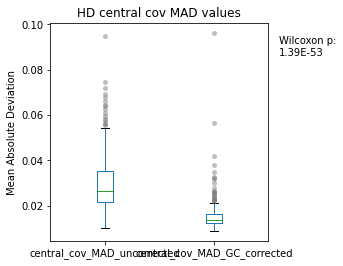

In [6]:
fig,ax = plt.subplots(1, figsize=(5,3.8))
ax.set_title('HD central cov MAD values')
merged[['central_cov_MAD_uncorrected','central_cov_MAD_GC_corrected']].plot.box(ax = ax, flierprops = {'marker':'.','markersize':10,'alpha':.5,'markerfacecolor':'grey','markeredgecolor':'none'})
ax.set_ylabel('Mean Absolute Deviation')
plt.tight_layout()
stat,wilcoxon_pval = wilcoxon(merged['central_cov_MAD_uncorrected'],merged['central_cov_MAD_GC_corrected'])
plt.text(1.05,.85, 'Wilcoxon p:\n'+'{:.2E}'.format(wilcoxon_pval), transform=ax.transAxes)

ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
fig.tight_layout()
plt.savefig('HD_MAD_boxplot.pdf')

In [7]:
merged

,central_cov_MAD_uncorrected,mean_cov_MAD_uncorrected,fft_10_magnitude_MAD_uncorrected,central_cov_MAD_GC_corrected,mean_cov_MAD_GC_corrected,fft_10_magnitude_MAD_GC_corrected
AHR.hg38,0.025018,0.005053,0.107853,0.012118,0.002761,0.110337
AR.hg38,0.014102,0.003281,0.113017,0.013240,0.002390,0.116023
ARID3A.hg38,0.016918,0.003472,0.106524,0.013463,0.002938,0.109825
ARNT.hg38,0.022689,0.007809,0.100607,0.012603,0.002985,0.106016
ARNTL.hg38,0.051637,0.006969,0.118707,0.013302,0.002768,0.123834
...,...,...,...,...,...,...
ZNF770.hg38,0.037980,0.003845,0.162643,0.015891,0.002634,0.162725
ZNF792.hg38,0.030477,0.010490,0.162008,0.015873,0.004298,0.164791
ZSCAN16.hg38,0.025403,0.004687,0.137852,0.032725,0.003220,0.165062
ZSCAN22.hg38,0.040298,0.014573,0.115133,0.014906,0.004301,0.121611


In [8]:
#numbmer of factors with decreased MAD
sum(merged['central_cov_MAD_uncorrected']>merged['central_cov_MAD_GC_corrected'])

324

In [9]:
rename_dict = {'fft_10_magnitude_MAD_uncorrected':'amplitude_MAD_uncorrected',
               'fft_10_magnitude_MAD_GC_corrected':'amplitude_MAD_GC_corrected'}
merged = merged.rename(columns = rename_dict)
new_col_order = ['central_cov_MAD_uncorrected', 'central_cov_MAD_GC_corrected',
 'mean_cov_MAD_uncorrected','mean_cov_MAD_GC_corrected',
 'amplitude_MAD_uncorrected', 'amplitude_MAD_GC_corrected']

merged[new_col_order].to_csv('S2_HD_MAD_scores.txt',sep='\t')

In [10]:
merged.columns

Index(['central_cov_MAD_uncorrected', 'mean_cov_MAD_uncorrected',
       'amplitude_MAD_uncorrected', 'central_cov_MAD_GC_corrected',
       'mean_cov_MAD_GC_corrected', 'amplitude_MAD_GC_corrected'],
      dtype='object')